<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Navigation" data-toc-modified-id="Navigation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Navigation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-Start-the-Environment" data-toc-modified-id="1.-Start-the-Environment-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>1. Start the Environment</a></span></li><li><span><a href="#2.-Examine-the-State-and-Action-Spaces" data-toc-modified-id="2.-Examine-the-State-and-Action-Spaces-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>2. Examine the State and Action Spaces</a></span></li><li><span><a href="#3.-Take-Random-Actions-in-the-Environment" data-toc-modified-id="3.-Take-Random-Actions-in-the-Environment-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>3. Take Random Actions in the Environment</a></span></li><li><span><a href="#4.-It's-Your-Turn!" data-toc-modified-id="4.-It's-Your-Turn!-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>4. It's Your Turn!</a></span><ul class="toc-item"><li><span><a href="#Define-Q-learning-pipeline" data-toc-modified-id="Define-Q-learning-pipeline-1.0.4.1"><span class="toc-item-num">1.0.4.1&nbsp;&nbsp;</span>Define Q-learning pipeline</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-1.0.4.2"><span class="toc-item-num">1.0.4.2&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-1.0.4.3"><span class="toc-item-num">1.0.4.3&nbsp;&nbsp;</span>Plots</a></span></li><li><span><a href="#Future-work" data-toc-modified-id="Future-work-1.0.4.4"><span class="toc-item-num">1.0.4.4&nbsp;&nbsp;</span>Future work</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

The Deep Q Network (DQN) which has been learned recently is a good solution for this project. As the instruction said, adjusting a little bit of the codes from the DQN project is enough. The below implementation codes are adapted from https://github.com/udacity/deep-reinforcement-learning/tree/master/dqn/solution 

Meanwhile, the course also introduced  
- dueling DQN which has two outputs from the neural network (value and advantage), DQN only with value. (https://arxiv.org/pdf/1511.06581.pdf)
- double DQN which use one network to choose the best action and the other to evaluate that action. (https://arxiv.org/pdf/1509.06461.pdf)
- prioritized experience reply which selects the sample according to the priorities. (https://arxiv.org/pdf/1511.05952.pdf)

There are many implementation and comparison of these methods. It would be interesting to try them for Banana-Navigation and see the different performance.

#### Define Q-learning pipeline

In [6]:
from collections import deque
from dqn_agent import Agent # own dqn_agent.py
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle

`dqn_agent` contains Agent class which has several implementations of value-based methods: DQN, dueling DQN, double DQN, and prioritized experience reply. The two arguments: `dqn_type` and `prioritized_reply` are used to control the type of method to use, e.g., `Agent(state_size=state_size, action_size=action_size, dqn_type='double-DQN', prioritized_reply=False, seed=0)`.

`dqn` function is used for training. The arguments controls different parameters during the training. If the training average score of the episode is over 15 (the requirement of Navigation project is 13 while I set to 15 to have more training scores), the training is good enough and will stop. 

In [7]:
def dqn(env = None, agent = None, 
        n_episodes=2000, max_t=1000, 
        eps_start=1.0, eps_end=0.01, 
        eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]   
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0: # requirement is 13 while I set to 15
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 
                       "".join(dqn_type+"_prioritized_experience_"+str(prioritized_reply)+'_checkpoint.pth'))
            break
    return scores

#### Training


Below is the different combinations of ["DQN", 'dueling-DQN', 'double-DQN', "double-dueling-DQN"] and using prioritized experience reply [False, True]. The initial idea to do like this way is to see how different training result and performance these methods can have. For each method, the maximum running episodes is 1000 and the maximum time steps is 500. Epsilon is set starts with 1.0 and ends with 0.01. The decay equal to 0.995.

In [8]:
s = dict()
dqn_types=["DQN", 'dueling-DQN', 'double-DQN', "double-dueling-DQN"]
prioritized_replys = [False, True]
for dqn_type in dqn_types:
    for prioritized_reply in prioritized_replys:
        print("Strating training with", dqn_type, "; prioritized experience reply =", prioritized_reply)
        agent = Agent(state_size=state_size, action_size=action_size, 
                      dqn_type=dqn_type, prioritized_reply=prioritized_reply, seed=0)
        scores = dqn(env = env, agent = agent, n_episodes=1000, max_t=500, eps_start=1.0, eps_end=0.01, eps_decay=0.995)
        s["".join(dqn_type + "_prioritized_experience_"+str(prioritized_reply))] = scores
        
with open('training_scores.pickle', 'wb') as handle:
    pickle.dump(s, handle, protocol=pickle.HIGHEST_PROTOCOL)

Strating traning with DQN ; prioritized experience reply = False
Episode 100	Average Score: 0.64
Episode 200	Average Score: 3.66
Episode 300	Average Score: 7.26
Episode 400	Average Score: 9.73
Episode 500	Average Score: 12.23
Episode 600	Average Score: 14.40
Episode 680	Average Score: 15.06
Environment solved in 580 episodes!	Average Score: 15.06
Strating traning with DQN ; prioritized experience reply = True
Episode 100	Average Score: 0.83
Episode 200	Average Score: 3.71
Episode 300	Average Score: 7.33
Episode 400	Average Score: 10.42
Episode 500	Average Score: 13.04
Episode 600	Average Score: 14.89
Episode 619	Average Score: 15.08
Environment solved in 519 episodes!	Average Score: 15.08
Strating traning with dueling-DQN ; prioritized experience reply = False
Episode 100	Average Score: 0.47
Episode 200	Average Score: 3.13
Episode 300	Average Score: 7.23
Episode 400	Average Score: 9.68
Episode 500	Average Score: 11.61
Episode 600	Average Score: 13.08
Episode 700	Average Score: 13.59
Ep

#### Plots

DQN_prioritized_experience_False : 680


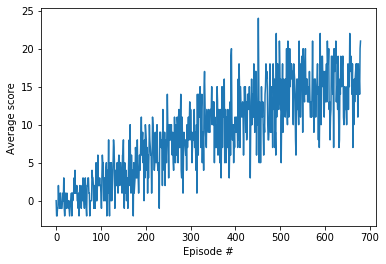

DQN_prioritized_experience_True : 619


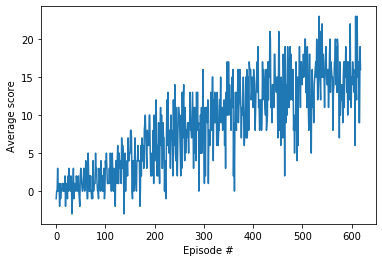

dueling-DQN_prioritized_experience_False : 1000


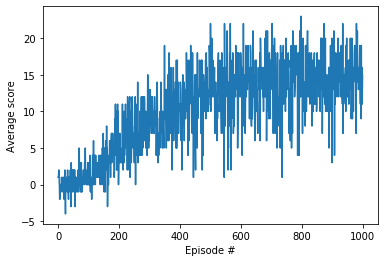

dueling-DQN_prioritized_experience_True : 664


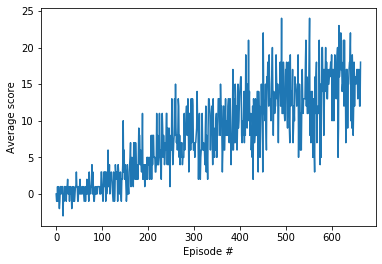

double-DQN_prioritized_experience_False : 667


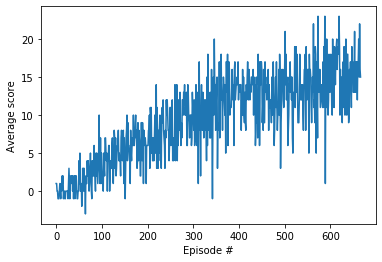

double-DQN_prioritized_experience_True : 599


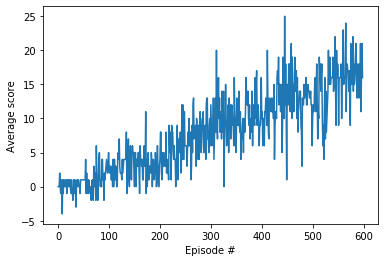

double-dueling-DQN_prioritized_experience_False : 678


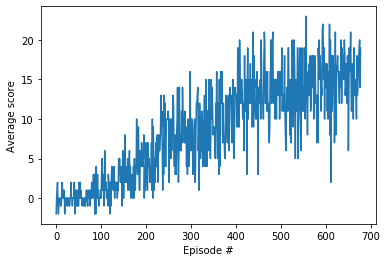

double-dueling-DQN_prioritized_experience_True : 586


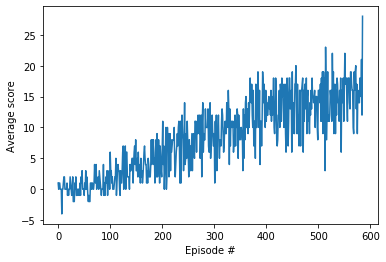

In [10]:
dqn_types=["DQN", 'dueling-DQN', 'double-DQN', "double-dueling-DQN"]
prioritized_replys = [False, True]

for method, scores in s.items(): 
    print(method, ":", len(scores))
    # plot the scores
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores, label = method)
    plt.ylabel('Average score')
    plt.xlabel('Episode #')
    plt.savefig("".join(method+"traning_plot.pdf"))
    plt.show()

When finished, you can close the environment.

In [11]:
env.close()

#### Future work


The above training took quite long to finish with personal CPU laptop. To test how fast the job can be done, testing with different parameters on GPU could be an option. Later, the course will contain policy-based method, it could also be interesting if solving this problem without value-based methods.  